In [1]:
import os
import sys

sys.path.append('model')

import torch
from model.data_loaders import LaneDataSet
from model.lanenet import LaneNet
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np

In [27]:
# 定义预测函数
def predict(data,model):
    for batch in data:
        """ ret = {
            'instance_seg_logits': pix_embedding,
            'binary_seg_pred': binary_seg_ret,
            'binary_seg_logits': decode_logits}"""
        road_gt = batch[0]
        image_data = road_gt
        seg_gt = batch[1].numpy()
        # print(seg_gt.shape) # (4, 224, 480)
        instance_input = batch[2].numpy()
        # print(instance_input.shape) # (4, 5, 224, 480)
        instance_gt = np.argmax(instance_input, axis=1)
        output = model(image_data)
        road_seg = output['binary_seg_pred']
        seg_pred = road_seg.detach().numpy().copy()
        # print(seg_pred.shape) # (4, 1, 224, 480)
        seg_pred = seg_pred.squeeze()
        instance_out = output['instance_seg_logits'].detach().numpy().copy()
        # print(instance_out.shape) # (4, 5, 224, 480)
        instance_pred =  np.argmax(instance_out, axis=1)
        
        
        for s_gt,i_gt,r_gt,s_p,i_p in zip(seg_gt,instance_gt,road_gt,seg_pred,instance_pred):
            print('-'*60)
            plt.figure()
            plt.subplot(231)
            plt.title('seg_pred')            
            plt.imshow(s_p,cmap = 'gray')
            
            plt.subplot(232)
            plt.title('instance_pred')
            plt.imshow(i_p)
            
            plt.subplot(233)
            plt.title('ground_truth')
            plt.imshow(r_gt.numpy().transpose(1, 2, 0))
            
            plt.subplot(234)
            plt.title('seg_gt')
            plt.imshow(s_gt,cmap = 'gray')
            
            plt.subplot(235)
            plt.title('instance_gt')
            plt.imshow(i_gt)
            
            plt.subplot(236)
            plt.title('ground_truth')
            plt.imshow(r_gt.numpy().transpose(1, 2, 0))
            plt.tight_layout()
            plt.show()
        break

In [35]:
file_dataset = './tusimple_0531/training'
# 使用训练的数据进行可视化
train_dataset_file = os.path.join(file_dataset, 'train.txt')

train_dataset = LaneDataSet(train_dataset_file, 
    transform=transforms.Compose([transforms.Resize((270,480)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.35248518, 0.37250566, 0.3955756], 
                std=[0.20043196, 0.2173182, 0.2510542])]))
train_loader = DataLoader(train_dataset, batch_size=2, shuffle = True)

In [39]:
save_path = 'save_path'
model = LaneNet()
pth_path ='./save_path/lanenet_200_20200829.pth'
model.load_state_dict(torch.load(pth_path))

<All keys matched successfully>

------------------------------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


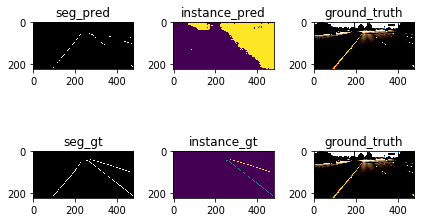

------------------------------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


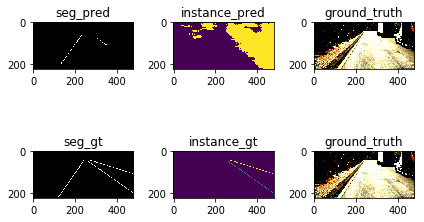

In [40]:
predict(train_loader,model)